# 1-this is a visual for train valid and test for omega--net

## 1-1 this is for train analysis
the tensor in the real_data
info={
                    'freq_index':[51]
                    'pred_freq_distribution':,[batch,51,2]\
                    'real_freq_distribution':,[batch，51，2]\
                    "pred_data":soft_freq_index,[batch,100,2]\
                    "real_data":soft_omega,[batch,100,2]\
                    "left_matrix":,[batch,100,102,2]\100 is t_steps
                    "pred_coeff":,[batch,102,2]
                    "labels":[batch]

      }

In [51]:
epoch=1
string=f"{epoch}.pth"

train_process_path = analysis_pth="/Users/liangaoming/Documents/Ai_station/neural_find_sol/wgan_2nd/expr2/expr2_results/expr2_97_data/train_process/inference_net/analysis_files/tensor_5.pth"
label_data_path="/Users/liangaoming/Documents/Ai_station/neural_find_sol/wgan_2nd/complex_center_dataset/"

In [52]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams["font.family"] = "STIXGeneral"

In [53]:
Tensors_train_process=torch.load(train_process_path)
Tensors_train_process.keys()

dict_keys(['freq_index', 'pred_freq_distribution', 'real_freq_distribution', 'pred_data', 'real_data', 'left_matrix', 'pred_coeffs', 'labels'])

In [54]:
Plot_real=Tensors_train_process["real_data"].detach().numpy()
Pred_data=Tensors_train_process["pred_data"].detach().numpy()
target_data=Plot_real

P_freq_data=Tensors_train_process["pred_freq_distribution"].cpu().detach().numpy()
R_freq_data=Tensors_train_process["real_freq_distribution"].cpu().detach().numpy()

data_t=np.linspace(0,2,100)
freq_index=Tensors_train_process["freq_index"].cpu().detach().numpy()
real_label=Tensors_train_process['labels'].numpy()

left_matrix=Tensors_train_process["left_matrix"].cpu().detach().numpy()
pred_coeffs=Tensors_train_process["pred_coeffs"].cpu().detach().numpy()
pred_coeffs.shape

(256, 101, 2)

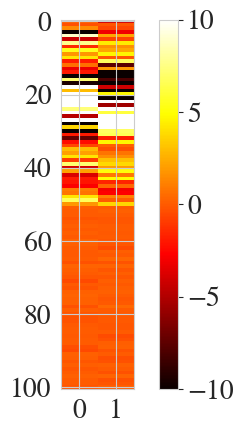

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 tensor 的名字是 data
plt.imshow(pred_coeffs[0, :, :], cmap='hot', interpolation='nearest',aspect=0.1)
plt.colorbar()
plt.clim(-10, 10)
plt.show()


In [57]:
import matplotlib as mpl
import ast
import pandas as pd
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size

In [58]:
#according to the label to read about the dict's function
def read_label_info(label_csv):
    csv=pd.read_csv(label_data_path+"data"+str(label_csv)+".csv")
    column_z1=csv["sol_z1"][0]+"}"
    column_z2="{"+csv["sol_z2"][0]
    # ast.literal_eval()
    try:
        column_z1 = ast.literal_eval(column_z1)
        column_z1 = {k: v.replace('z1=', '') for k, v in column_z1.items()}

        column_z2= ast.literal_eval(column_z2)
        column_z2=  {k: v.replace('z2=', '') for k, v in column_z2.items()}

        dict_sol={**column_z1,**column_z2}
        print(dict_sol)
    except (ValueError, SyntaxError):
        print("error")
    return dict_sol

In [59]:
def plot_loss(path, loss_train, x_log=False):

    """
    Plot loss.
    Args:
        path (str): path.
        loss_train (list): list of training loss.
        x_log (bool): whether to use log scale for x-axis.
    Returns:
        None.
    """
    plt.figure()
    ax = plt.gca()
    y2 = np.asarray(loss_train)
    plt.plot(y2, 'k-', label='Train')
    plt.xlabel('epoch', fontsize=18)
    ax.tick_params(labelsize=18)
    plt.yscale('log')
    if x_log == False:
        fntmp = os.path.join(path, 'loss.png')

    else:
        plt.xscale('log')
        fntmp = os.path.join(path, 'loss_log.png')
    plt.tight_layout()
    plt.savefig(fntmp,dpi=300)

    plt.close()
def plot_model_output(path, args, output, epoch):

    plt.figure()
    ax = plt.gca()

    plt.plot(args.training_input.detach().cpu().numpy(),
             args.training_target.detach().cpu().numpy(), 'b*', label='True')
    plt.plot(args.test_input.detach().cpu().numpy(),
             output.detach().cpu().numpy(), 'r-', label='Test')

    ax.tick_params(labelsize=18)
    plt.legend(fontsize=18)
    fntmp = os.path.join(path, 'output', str(epoch)+'.png')

    plt.savefig(fntmp, dpi=300)


    plt.close()
def my_fft(data, freq_len=40, isnorm=1):

    """
    This function performs FFT on the given data.

    Args:
    data (numpy.ndarray): The input data.
    freq_len (int): The length of the frequency.
    isnorm (int): The normalization factor.

    Returns:
    return_fft (numpy.ndarray): The FFT output array.
    """

    # second_diff_input = np.mean(np.diff(np.diff(np.squeeze(x_input))))
    # if abs(second_diff_input) < 1e-10:
    datat = np.squeeze(data)
    datat_fft = np.fft.fft(datat)
    ind2 = range(freq_len)
    fft_coe = datat_fft[ind2]
    if isnorm == 1:
        return_fft = np.absolute(fft_coe)
    else:
        return_fft = fft_coe

    return return_fft
def SelectPeakIndex(FFT_Data, endpoint=True):

    """
    This function selects the peak index from FFT data.

    Args:
    FFT_Data (numpy.ndarray): The FFT data array.
    endpoint (bool): Whether to include endpoints or not. Default is True.

    Returns:
    sel_ind (numpy.ndarray): Selected index array with peaks.
    """

    D1 = FFT_Data[1:-1]-FFT_Data[0:-2]
    D2 = FFT_Data[1:-1]-FFT_Data[2:]
    D3 = np.logical_and(D1 > 0, D2 > 0)
    tmp = np.where(D3 == True)
    sel_ind = tmp[0]+1
    if endpoint: #
        if FFT_Data[0]-FFT_Data[1] > 0:
            sel_ind = np.concatenate([[0], sel_ind])
        if FFT_Data[-1]-FFT_Data[-2] > 0:
            Last_ind = len(FFT_Data)-1
            sel_ind = np.concatenate([sel_ind, [Last_ind]])
    return sel_ind
def plot_freq_distr(**kwargs):
    """
    Plot frequency distribution and the heatmap of the given training target and output.

    Args:
    args: A dictionary containing training target and output.

    Returns:
    None
    """
    freq_index=kwargs["freq_index"]
    P_freq_data=kwargs["pred_freq_distribution"]
    R_freq_data=kwargs["real_freq_distribution"]

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].semilogy(freq_index,R_freq_data[0,:,1]+1e-5, label='Real data')
    idx = SelectPeakIndex(R_freq_data[0,:,1], endpoint=False)

    ax[0].semilogy(freq_index[idx], R_freq_data[0,idx,1]+1e-5, '*',label='Real peak')

    ax[0].semilogy(freq_index,P_freq_data[0,:,1]+1e-5, label='Model predict')
    idx = SelectPeakIndex(P_freq_data[0,:,1], endpoint=False)
    ax[0].semilogy(freq_index[idx], P_freq_data[0,idx,1]+1e-5, 'o',label='Pred peak')
    ax[0].legend(fontsize=12)
    plt.xlabel('freq idx', fontsize=22)
    plt.ylabel('freq', fontsize=22)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)
    plt.tight_layout()
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_color('black')
        ax[0].spines[spine].set_linewidth(2)
   # plt.savefig(os.path.join(args.path, 'fft.png'), dpi=300)
    plt.show()



    #
    # y_pred_epoch = np.squeeze(args.training_output)
    # idx1 = idx[:3]
    # abs_err = np.zeros([len(idx1), len(args.training_output)])
    # y_fft = my_fft(args.training_target)
    # tmp1 = y_fft[idx1]
    # print(abs_err.shape)
    # for i in range(len(y_pred_epoch)):
    #     tmp2 = my_fft(y_pred_epoch[i])[idx1]
    #     abs_err[:, i] = np.abs(tmp1 - tmp2)/(1e-5 + tmp1)
    #
    #
    #
    # plt.figure(figsize=(8, 6))
    # ax = plt.gca()
    # plt.pcolor(abs_err, cmap='RdBu', vmin=0.1, vmax=1, linewidths=0.4)
    # plt.colorbar()
    #
    #
    # plt.xlabel('Epoch', fontsize=22)
    #
    # # Set the y-axis ticks and labels to 1, 2, 3, and rotate the labels
    # plt.yticks([0.5, 1.5, 2.5], [1, 2, 3], rotation=0, fontsize=22)
    #
    # # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    # plt.gca().yaxis.set_tick_params(size=0)
    # plt.gca().tick_params(axis='y', labelsize=22)
    # plt.gca().tick_params(axis='x', labelsize=22)
    #
    #
    # plt.title('Absolute Error', fontsize=22)
    #
    # plt.tight_layout()
    #
    # plt.savefig(os.path.join(args.path, 'hot.png'))
    # plt.show()
    # plt.close()
def Return_symbolic(coeffs,freq_index)->dict:

    '''
    :param coeffs: [101]
    :param freq_index: [51]
    :return: a dict of symbolic expression
    '''
    coeffs_nodc=coeffs[1:].reshape(-1,2) #beacuse sin & cos family
    freq_index_nodc=freq_index[1:]
    symbolic={"y":None}

    terms = []
    dc_term=f"{coeffs[0]:.2f}"
    terms.append(dc_term)
    for i, freq in enumerate(freq_index_nodc):
        sin_coef= coeffs_nodc[i,0]
        cos_coef= coeffs_nodc[i,1]
        term = f"{sin_coef:.2f}*sin({freq:.2f}*t)"+f"+ {cos_coef:.2f}*cos({freq:.2f}*t)"
        terms.append(term)

    expression = " + ".join(terms)
    symbolic["y"]=expression
    return symbolic


def plot_target_pred_result(data_t,target_data,pred_data,label,pred_coeffs,freq_index):
    """
    Plot the target.

    Args:
        target_tensor_tensor (torch.Tensor): The target tensor.
        pred_tensor (torch.Tensor): The prediction tensor.

    """
    target_function = read_label_info(label_csv=label)
    pred_function = Return_symbolic(coeffs=pred_coeffs[0,:,0],freq_index=freq_index)
    plt.figure()
    ax = plt.gca()

    plt.plot(data_t,
             target_data, 'b*', label='True function')
    plt.plot(data_t,
             pred_data, 'r-', label='Test function')

    ax.tick_params(labelsize=18)
    plt.legend(fontsize=10,loc="upper right")
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(2)
    plt.show()

    print("The target function:",target_function)
    print("The pred function:",pred_function)


# 1.1 real_data omega analysis data

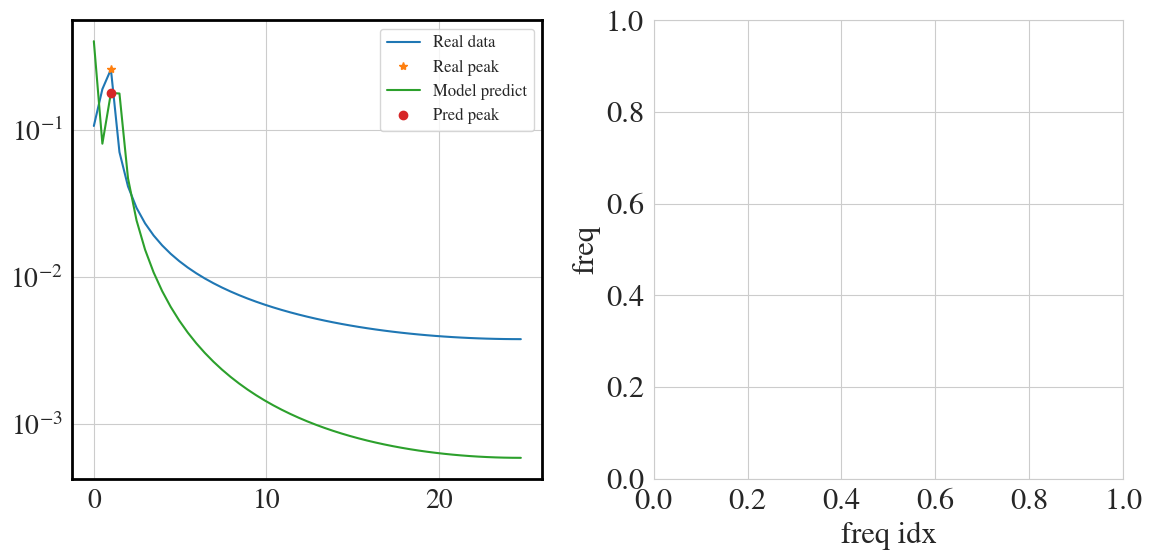

{'z1_solu': '29*sin(5*t) + 23*cos(5*t)', 'z2_solu': '-23*sin(5*t) + 29*cos(5*t)'}


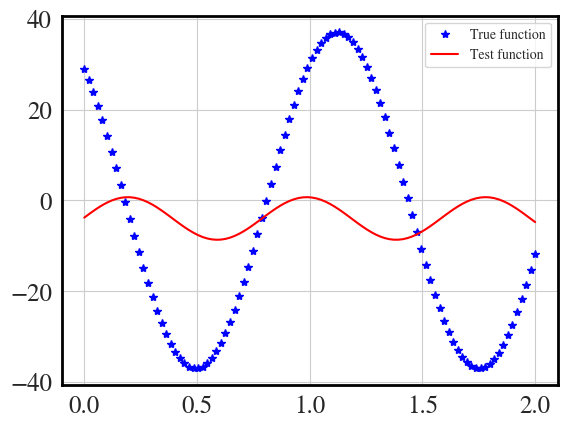

The target function: {'z1_solu': '29*sin(5*t) + 23*cos(5*t)', 'z2_solu': '-23*sin(5*t) + 29*cos(5*t)'}
The pred function: {'y': '0.15 + -0.31*sin(0.50*t)+ 1.46*cos(0.50*t) + -17.91*sin(0.99*t)+ 8.83*cos(0.99*t) + -4.30*sin(1.49*t)+ 7.70*cos(1.49*t) + -1.42*sin(1.98*t)+ 5.42*cos(1.98*t) + 1.81*sin(2.47*t)+ 4.19*cos(2.47*t) + -1.86*sin(2.97*t)+ 0.59*cos(2.97*t) + -3.22*sin(3.47*t)+ -2.00*cos(3.47*t) + -11.47*sin(3.96*t)+ 7.14*cos(3.96*t) + -9.44*sin(4.45*t)+ 17.10*cos(4.45*t) + 2.92*sin(4.95*t)+ 24.90*cos(4.95*t) + 18.67*sin(5.45*t)+ 19.37*cos(5.45*t) + 19.57*sin(5.94*t)+ 7.28*cos(5.94*t) + 15.11*sin(6.43*t)+ -4.81*cos(6.43*t) + 19.84*sin(6.93*t)+ -12.31*cos(6.93*t) + 3.70*sin(7.43*t)+ -13.14*cos(7.43*t) + -1.93*sin(7.92*t)+ -7.23*cos(7.92*t) + -2.27*sin(8.41*t)+ -0.59*cos(8.41*t) + 2.95*sin(8.91*t)+ 2.09*cos(8.91*t) + 4.16*sin(9.40*t)+ -0.84*cos(9.40*t) + 7.18*sin(9.90*t)+ -4.03*cos(9.90*t) + 2.19*sin(10.40*t)+ -3.78*cos(10.40*t) + -1.95*sin(10.89*t)+ -2.10*cos(10.89*t) + -2.74*sin(11.3

In [60]:
plot_freq_distr(freq_index=freq_index,
                pred_freq_distribution=P_freq_data,
                real_freq_distribution=R_freq_data)
plot_target_pred_result(data_t=np.linspace(0,2,100),
                        target_data=target_data[0,:,0],
                        pred_data=Pred_data[0,:,0],
                        label=real_label[0],
                        pred_coeffs=pred_coeffs,
                        freq_index=freq_index)

In [47]:
pred_coeffs

array([[[-0.12560464, -0.21175659],
        [ 0.01422252, -0.03987337],
        [ 0.04009431, -0.03223367],
        ...,
        [-0.01062757, -0.02746592],
        [ 0.06461088, -0.01756253],
        [-0.05163464,  0.0033905 ]],

       [[ 0.5439308 ,  0.10198373],
        [ 0.02992791, -0.00832864],
        [ 0.05349218,  0.00251765],
        ...,
        [-0.01757489,  0.01237553],
        [-0.00737154, -0.00200524],
        [-0.06251208, -0.06772222]],

       [[ 0.21712814, -0.24814095],
        [-0.04367183, -0.04589044],
        [-0.00321632, -0.04486744],
        ...,
        [ 0.01898523,  0.00823302],
        [ 0.01698921,  0.01826664],
        [-0.03327772,  0.08023374]],

       ...,

       [[-0.14714266, -0.01515207],
        [ 0.01045903, -0.03309767],
        [ 0.05293565, -0.03074991],
        ...,
        [ 0.001487  , -0.01475224],
        [-0.12238118,  0.00349294],
        [-0.08300389,  0.05362838]],

       [[-0.14714685, -0.0150561 ],
        [ 0.01044356, -0.03

## 1.2 here we handle the loss visualization
loss visualize the train_loss and valid_Loss and test results
and we could handle the performace in the training the omega and data
#### train_process_directory="train_process/omega_net/tb_event/"
#### valid_process_u_directory="valid_process/omega_net/tb_event/valid_process_u_stat/"
#### valid_process_mse_directory="valid_process/omega_net/tb_event/valid_process_mse_loss/"
#### test_process_mse_directory="test_process/omega_net/tb_event/test_process_mse_loss/"
#### test_process_u_directory="test_process/omega_net/tb_event/test_process_u_stat/"


In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
import os
import pandas as pd 
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size

# search the files_info abput event 
train_process_directory="train_process/omega_net/tb_event/"
valid_process_u_directory="valid_process/omega_net/tb_event/valid_process_u_stat/"
valid_process_mse_directory="valid_process/omega_net/tb_event/valid_process_mse_loss/"
test_process_mse_directory="test_process/omega_net/tb_event/test_process_mse_loss/"
test_process_u_directory="test_process/omega_net/tb_event/test_process_u_stat/"
from tensorboard.backend.event_processing import event_accumulator



## here we read the config.csv to read the parameters to a dict
config_csv="csv/config.csv"

In [300]:
config_csv="csv/config.csv"
config= pd.read_csv(config_csv)
config_name=config.loc[:,'Unnamed: 0']
config_para=config.loc[:,'0']

FileNotFoundError: [Errno 2] No such file or directory: 'csv/config.csv'

In [301]:
config_dict={str(key):value for key,value in zip(config_name,config_para)}

NameError: name 'config_name' is not defined

In [302]:
def search_files_info(directory_path="train_process/omega_net/tb_event"):
    '''
    params: input:path 
    return list of name
    '''
    # List all files in the directory
    file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    print(file_names)
    return file_names

In [43]:
def plot_heat_tensor_change( tensor_loss_dict,epochs):

    

    #get the batch size
    gradient_loss=tensor_loss_dict[].cpu().detach().numpy()
    ini_loss=ini_loss.cpu().detach().numpy()
    score_fake_out=score_fake_out.cpu().detach().numpy()
    generator_loss=generator_all_loss.cpu().detach().numpy()

    #prepare the plot
    #fill
    generator_numpy[0,now_epoch]=   gradient_loss #
    generator_numpy[1, now_epoch] = ini_loss #
    generator_numpy[2,now_epoch] =  score_fake_out#
    generator_numpy[3,now_epoch] =  generator_all_loss#
    #plot the sub figure
    plt.figure(figsize=(8, 6))
    #note that the first dimension y axis is z1 and z2
    norm = colors.SymLogNorm(linthresh=1e-3, linscale=1, vmin=-1e-2, vmax=1e+2)
    plt.pcolor(generator_numpy, cmap='RdBu',norm=norm)
    cbar=plt.colorbar()
    cbar.set_label('Log Scale')

    plt.xlabel('Epoch', fontsize=22)
    # Set the y-axis ticks and labels to 1, 2 and rotate the labels
    y_positions = [0.5, 1.5, 2.5,3.5]
    y_labels = [r'$gradient_{loss}$', r'$ini_{loss}$',r'$score_{fake}$',r'$generator_{loss}$']
    plt.axhline(y=1, color='black', linewidth=2)
    plt.axhline(y=2, color='black', linewidth=2)
    plt.axhline(y=3, color='black', linewidth=2)
    plt.yticks(y_positions, y_labels, fontsize=22)
    # axis
    ax = plt.gca()

    # spines
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)  # 可以调整线的宽度

    # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    plt.gca().yaxis.set_tick_params(size=0)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)

    plt.title("genertor dynamic response", fontsize=22)

    plt.tight_layout()
    plt.savefig(plot_path + "/generator_loss.png")

SyntaxError: invalid syntax (1311987081.py, line 1)

## here we plot loss and value in the differnt process with the epoch 
1.train_loss\
2.valid_loss\
3.test_result\
4.some record values\
func:event_list_path=search_files_info(test_process_mse_directory)

In [107]:
#load your models from tb 
event_list_path=search_files_info(test_process_mse_directory)
epoch_step=5

name_4value={"train_process":train_process_directory,
             "valid_u":valid_process_u_directory,"valid_mse":valid_process_mse_directory,
            "test_u":test_process_u_directory,"test_mse":test_process_mse_directory}


dict_loss={"train_process":[],
           "valid_u":[],"valid_mse":[],
           "test_mse":[],"test_u":[]}


['events.out.tfevents.1695780035.33hddvfbvfg8r-0.108693.8']


In [108]:
name_4value.keys()


dict_keys(['train_process', 'valid_u', 'valid_mse', 'test_u', 'test_mse'])

In [109]:

for i, key in enumerate(name_4value.keys()):
    #load tensorboard
    print(key)
   
    event_list_path=search_files_info(name_4value[key])
    ea=event_accumulator.EventAccumulator(name_4value[key]+event_list_path[0]) 
    ea.Reload()
    print(ea.scalars.Keys())
    name=ea.scalars.Keys()[0]
    steps=len(ea.scalars.Items(name)) 
    print(steps)

    loss_array=[]
    for i in range (steps):
        dict_loss[key].append(ea.scalars.Items(name)[i].value) 


train_process
['events.out.tfevents.1695779980.33hddvfbvfg8r-0.108693.0']
['train_process']
5
valid_u
['events.out.tfevents.1695779993.33hddvfbvfg8r-0.108693.7']
['valid_process']
5
valid_mse
['events.out.tfevents.1695779993.33hddvfbvfg8r-0.108693.6']
['valid_process']
5
test_u
['events.out.tfevents.1695780035.33hddvfbvfg8r-0.108693.9']
['test_process']
1
test_mse
['events.out.tfevents.1695780035.33hddvfbvfg8r-0.108693.8']
['test_process']
1


In [117]:
dict_loss['test_mse'] 

[56.09494400024414]

In [118]:
dict_loss['test_u'] 

[0.55525803565979]

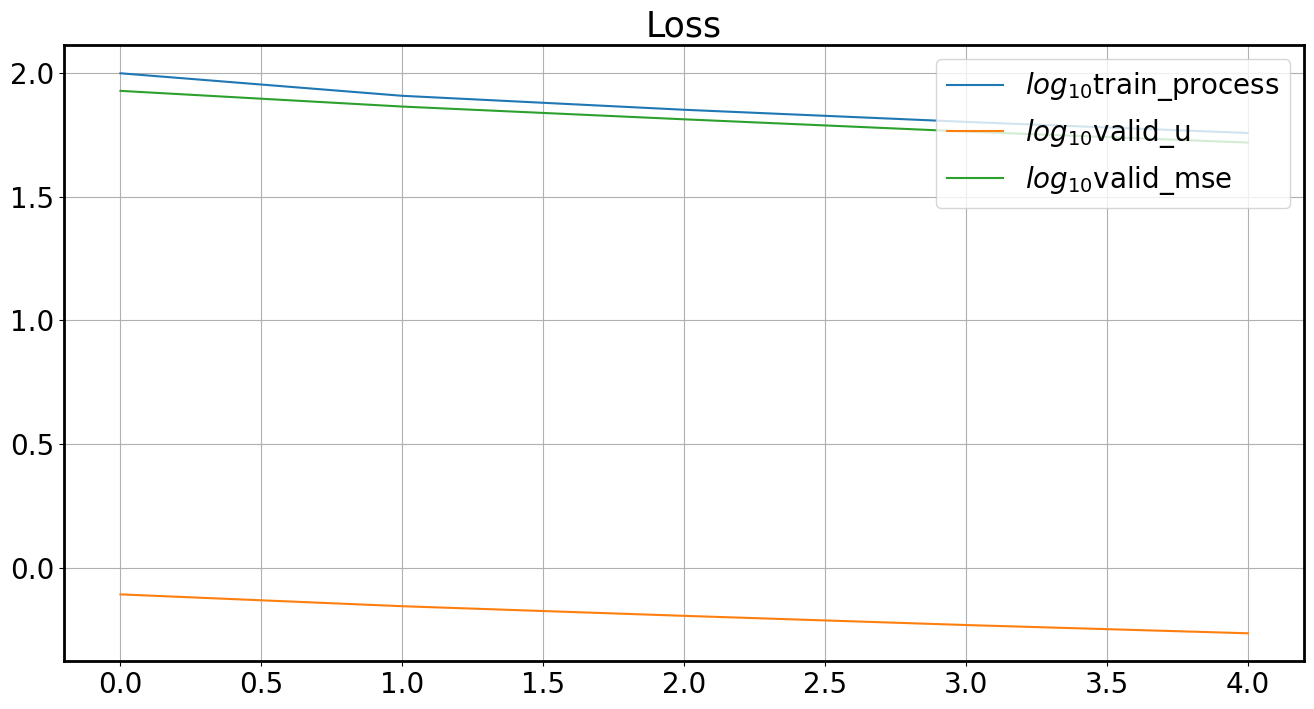

In [114]:
#plot for the loss

fig,ax=plt.subplots(figsize=(16,8))
for key,value in dict_loss.items():


    if  key == "test_mse" or key=="test_u":
        continue
        
    else:
        ax.plot(np.log10(dict_loss[key]),label="$log"+"_{10}$"+key)

   
        

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2)

# 显示图形
ax.legend(loc="upper right")
ax.set_title("Loss")
plt.grid(True)
plt.show()

In [317]:
def create_sinusoidal_expression(coeffs, freqs):
    if len(coeffs) != 101 or len(freqs) != 50:
        return "Invalid input lengths"

    # 第一个系数是常数项
    expression = f"{coeffs[0]:.2f}"

    # 然后添加sin和cos项
    for i in range(50):
        sin_coeff = coeffs[2*i + 1]
        cos_coeff = coeffs[2*i + 2]
        freq = freqs[i]

        if sin_coeff != 0:
            expression += f" + {sin_coeff:.2f} * sin({freq} * t)"

        if cos_coeff != 0:
            expression += f" + {cos_coeff:.2f} * cos({freq} * t)"

    return expression

# 示例
coeffs = [1, 0.5, 0.3, 0.7, 0.2]  # 实际输入应该有101个元素
freqs = [1, 2]  # 实际输入应该有50个元素
expression = create_sinusoidal_expression(coeffs, freqs)
print("Generated expression:", expression)


Generated expression: Invalid input lengths
